#### Insert images on 1170x540 image/frame and Convert to video file

In [1]:
import os, glob
import cv2
import fnmatch
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

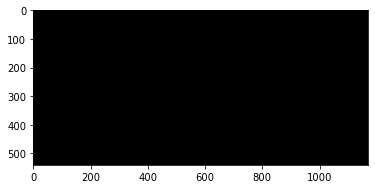

In [2]:
img = Image.new("RGB", (1170, 540), (0,0,0))
plt.imshow(img)
img.save("/Users/kpangalu/Downloads/blankimg_1170x540.png","PNG")

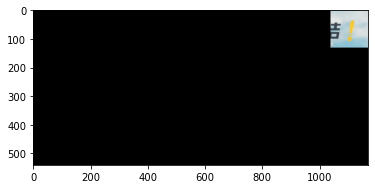

In [3]:
#just for testing
bimg = Image.open("/Users/kpangalu/Downloads/blankimg_1170x540.png")
simg = Image.open("/Users/kpangalu/Downloads/validation/Eval_Background/minimap_948.png")

h, w = simg.size
back_img = bimg.copy()
#The position to paste the image (x_cord in upper left, y_cord in upperleft)
#The minimap ROI is top left (1036, 0), bottom right (1170, 130) in a 1170x540 image
back_img.paste(simg, (1169-w, 1))
plt.imshow(back_img)
plt.show()

back_img.save("/Users/kpangalu/Downloads/blankimg_1170x540ii.png","PNG", quality=99)

In [4]:
path = ["/Users/kpangalu/Downloads/validation/Eval_Explosion/"]
# path = ["/Users/kpangalu/Downloads/validation/Eval_Othericons/"]
# path = ["/Users/kpangalu/Downloads/validation/Eval_Background/"]
kk = 0
kk = 0
for i in path:
    for filename in os.listdir(i):
        #fname = os.path.join(i,filename)
        #simg = cv2.imread(os.path.join(i,filename), cv2.COLOR_BGR2RGB)
        simg = Image.open(os.path.join(i,filename))
        #plt.imshow(img)
        #plt.show()
        h, w = simg.size
        back_img = bimg.copy()
        back_img.paste(simg, (1169-w, 1))
        #plt.imshow(back_img)
        #plt.show()
        #repaeting the same image range(2) times
        for jj in range(2):
            kk+=1
            num = kk
            if(kk <10):
                numm = '00' + str(num)
            if (np.int(num) > 9 and np.int(num) < 99):
                numm = '0' + str(num)
            elif (np.int(num) > 99):
                numm = str(num)
            nimgfile = "/Users/kpangalu/Downloads/validation/dummy/" +'img_' + str(numm) + ".png"
            bbimg = back_img.copy()
            
            #paste numbers on the image
            draw = ImageDraw.Draw(bbimg)
            font = ImageFont.truetype(r"/Users/kpangalu/Downloads/fonts/ARIBL0.ttf", 16)
            text = str(numm)
            draw.text((1040,105), text, font=font)
            
            #print(nimgfile)
            bbimg.save(nimgfile,"PNG", quality=99)
 


###### Making video file using images (OpenCV method)

In [5]:
# #Video generation function using opencv
# image_folder = "/Users/kpangalu/Downloads/validation/dummy/"

# images = [img for img in os.listdir(image_folder)
#                                    if img.endswith(".jpg") or
#                                    img.endswith(".jpeg") or
#                                    img.endswith("png")]
# # print(images)
# #collecting the width, height of the first image
# frame = cv2.imread(os.path.join(image_folder, images[0]))
# height, width, channels = frame.shape
# # print(height, width, channels)

# video_name= "/Users/kpangalu/Downloads/explosion1_video.mp4"
# video = cv2.VideoWriter(video_name,0, 1, (width, height))

# #Appending the images to video one by one
# for image in images:
#     video.write(cv2.imread(os.path.join(image_folder, image)))
    
# cv2.destroyAllWindows()
# video.release()

##### making video using images (2nd method)

In [5]:
from moviepy.editor import *
from pathlib import Path

img_clips = []
path_list=[]
img_folder = "/Users/kpangalu/Downloads/validation/dummy/"
#accessing path of each image
for image in os.listdir(img_folder):
    if image.endswith(".png"):
        path_list.append(os.path.join(img_folder, image))
        
#creating slide for each image
for img_path in path_list:
    slide = ImageClip(img_path,duration=0.075)
    img_clips.append(slide)
    
#concatenating slides
video_slides = concatenate_videoclips(img_clips, method='compose')
#exporting final video
video_slides.write_videofile("/Users/kpangalu/Downloads/validation/exploasion1020_video.mp4", fps=24)

Moviepy - Building video /Users/kpangalu/Downloads/validation/exploasion1020_video.mp4.
Moviepy - Writing video /Users/kpangalu/Downloads/validation/exploasion1020_video.mp4



Moviepy - Done !
Moviepy - video ready /Users/kpangalu/Downloads/validation/exploasion1020_video.mp4
